In [1]:

import numpy as np
from sklearn import preprocessing

from dataset.dataset import Dataset
from models.neural_net import NeuralNet
from models.sampled_net import SampledNet
from view.visualizer import plot_weight_biases_differences, initial_network_vs_converted_sampled_network, \
    plot_weight_vectors_and_point_pairs


### Dataset Creation

In [2]:
num_samples = 200  # Number of data points
layer_width = 50
num_epochs_for_adam = 150

dataset = Dataset()
dataset.create_dataset_laplacian_of_gaussian(num_samples)
dataset.scale(preprocessing.MinMaxScaler(feature_range=(-2, 2)))
dataset.split_train_test(0.2)

### Neural Network training with Adam

In [3]:
model_adam = NeuralNet()
model_adam.fit(dataset.X_train, dataset.y_train, [layer_width], epochs=num_epochs_for_adam)


Epoch 1/150
4/4 [==============================] - 1s 89ms/step - loss: 2.5930 - val_loss: 1.7271
Epoch 2/150
4/4 [==============================] - 0s 10ms/step - loss: 2.2600 - val_loss: 1.4921
Epoch 3/150
4/4 [==============================] - 0s 10ms/step - loss: 1.9665 - val_loss: 1.2880
Epoch 4/150
4/4 [==============================] - 0s 10ms/step - loss: 1.7192 - val_loss: 1.1197
Epoch 5/150
4/4 [==============================] - 0s 10ms/step - loss: 1.5038 - val_loss: 0.9821
Epoch 6/150
4/4 [==============================] - 0s 10ms/step - loss: 1.3407 - val_loss: 0.8768
Epoch 7/150
4/4 [==============================] - 0s 10ms/step - loss: 1.1984 - val_loss: 0.7979
Epoch 8/150
4/4 [==============================] - 0s 10ms/step - loss: 1.0850 - val_loss: 0.7423
Epoch 9/150
4/4 [==============================] - 0s 10ms/step - loss: 0.9979 - val_loss: 0.7046
Epoch 10/150
4/4 [==============================] - 0s 10ms/step - loss: 0.9451 - val_loss: 0.6783
Epoch 11/150
4/4 [=

### Convert it into a Sampled Network, and visualisation of the result

Layer1 sampling: 100%|██████████| 50/50 [00:00<00:00, 1597.39it/s]

loss(y_base, y_sampled)
r2: 0.8940752954596874	mse: 0.010194388910121548
are given weight matrices equal:  False
Correlation of weight vector norms: 0.9839


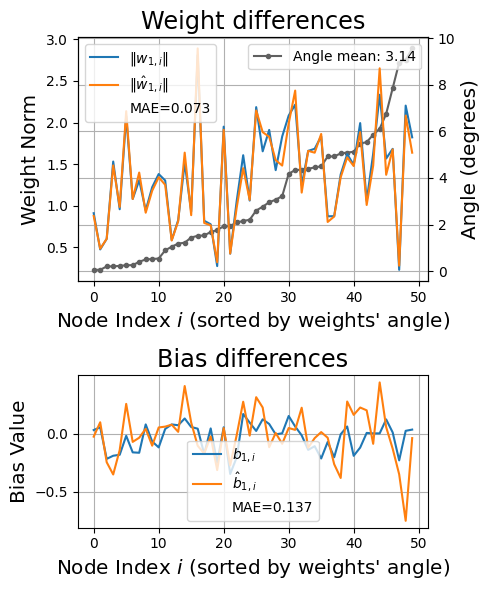

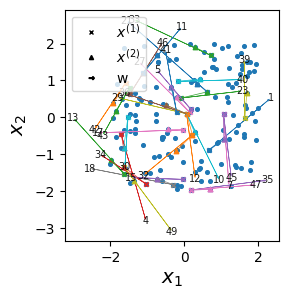

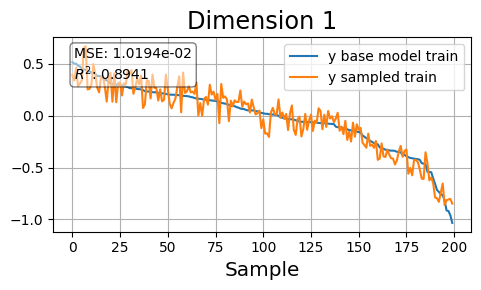

In [4]:
network_to_convert = model_adam

model_sampled = SampledNet()
x_1_x_2_tuples = model_sampled.fit(dataset.X_train, network_to_convert, layer2="bias_only", r=0.05,
                                   project_onto_boundary=False)
initial_network_vs_converted_sampled_network(dataset, network_to_convert, model_sampled, x_1_x_2_tuples)


### During training of a network with Adam, convert it into a sampled network every each specified number of epochs, and visualize the results.

Epoch 1/20
18/18 [==============================] - 1s 8ms/step - loss: 4.7748 - val_loss: 2.7431
Epoch 2/20
18/18 [==============================] - 0s 4ms/step - loss: 2.4338 - val_loss: 1.6194
Epoch 3/20
18/18 [==============================] - 0s 3ms/step - loss: 1.6560 - val_loss: 1.3480
Epoch 4/20
18/18 [==============================] - 0s 3ms/step - loss: 1.3546 - val_loss: 1.1685
Epoch 5/20
18/18 [==============================] - 0s 3ms/step - loss: 1.1640 - val_loss: 1.0331
Epoch 6/20
18/18 [==============================] - 0s 4ms/step - loss: 1.0163 - val_loss: 0.9181
Epoch 7/20
18/18 [==============================] - 0s 4ms/step - loss: 0.9089 - val_loss: 0.8352
Epoch 8/20
18/18 [==============================] - 0s 3ms/step - loss: 0.8229 - val_loss: 0.7679
Epoch 9/20
18/18 [==============================] - 0s 3ms/step - loss: 0.7576 - val_loss: 0.7249
Epoch 10/20
18/18 [==============================] - 0s 4ms/step - loss: 0.7060 - val_loss: 0.6838
Epoch 11/20
18/18 [

Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 174.60it/s]


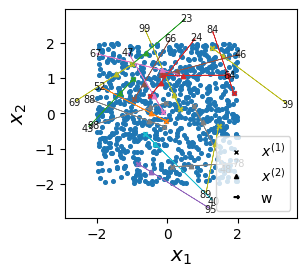

are given weight matrices equal:  False
Correlation of weight vector norms: 0.9989


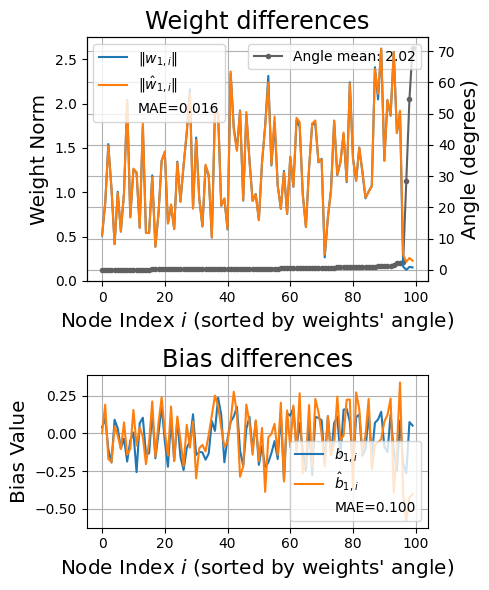

Validation Loss after 40 epochs: 0.2383


Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 158.53it/s]


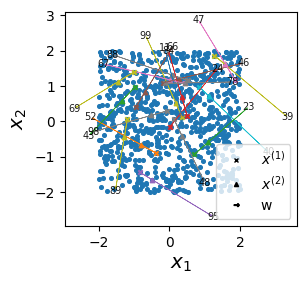

are given weight matrices equal:  False
Correlation of weight vector norms: 0.9991


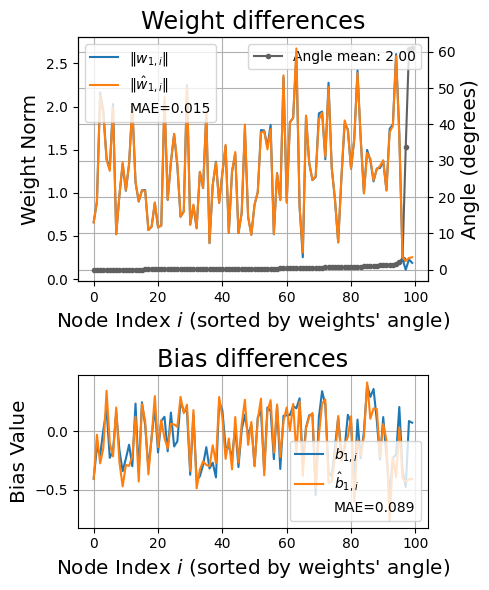

Validation Loss after 60 epochs: 0.1379


Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 173.80it/s]


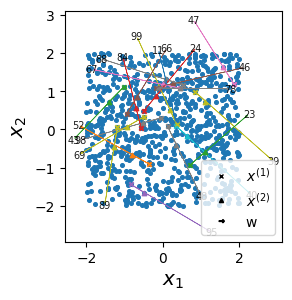

are given weight matrices equal:  False
Correlation of weight vector norms: 0.9993


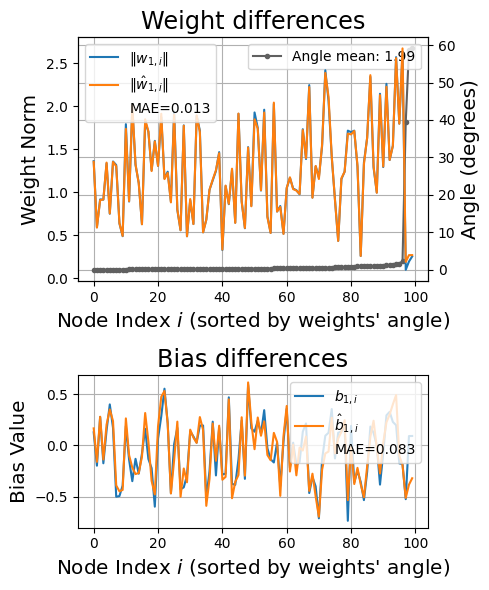

Validation Loss after 80 epochs: 0.0766


Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 178.12it/s]


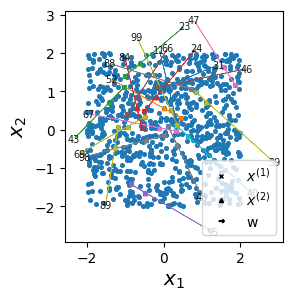

are given weight matrices equal:  False
Correlation of weight vector norms: 0.9993


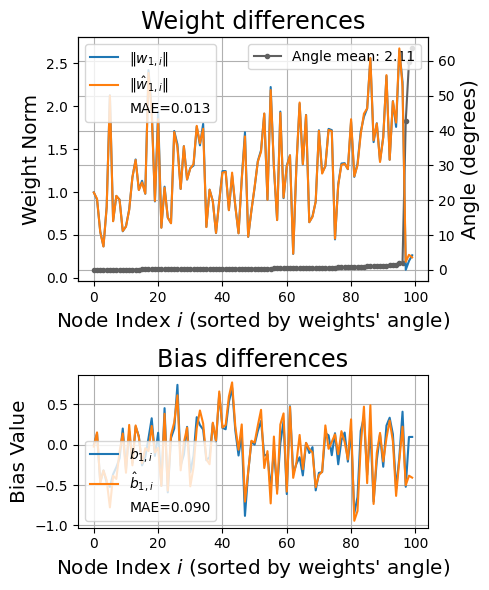

Validation Loss after 100 epochs: 0.0471


Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 162.51it/s]


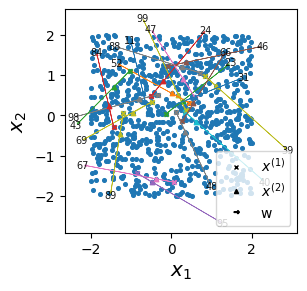

are given weight matrices equal:  False
Correlation of weight vector norms: 0.9991


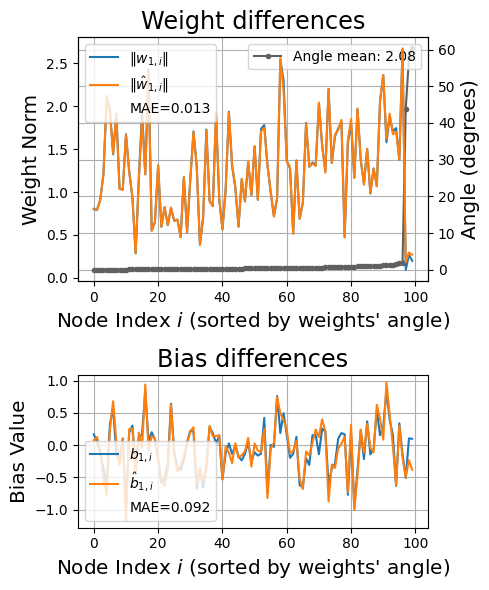

In [5]:


num_samples = 1000  # Number of data points
layer_width = 100

d_epochs = 20
num_intervals = 5

num_vectors_to_visualize = 20

dataset = Dataset().create_dataset_sinus_2d(num_samples)
dataset.scale(preprocessing.MinMaxScaler(feature_range=(-2, 2)))
dataset.split_train_test(0.2)

model_adam = NeuralNet()

initial_epoch = 0

for i in range(num_intervals):
    if i == 0:
        model_adam.fit(dataset.X_train, dataset.y_train, layers=[layer_width], epochs=d_epochs, validation_split=0.3)
    else:
        model_adam.resume_training(
            dataset.X_train,
            dataset.y_train,
            initial_epoch=initial_epoch,
            epochs=initial_epoch + d_epochs,
            validation_split=0.3,
        )

    # Evaluate the model_adam after training
    evaluation = model_adam.model.evaluate(dataset.X_test, dataset.y_test, verbose=0)

    print(f"Validation Loss after {initial_epoch + d_epochs} epochs: {evaluation:.4f}")

    model_sampled = SampledNet()
    x_1_x_2_tuples = model_sampled.fit(dataset.X_train, model_adam, r=0.05)

    plot_weight_vectors_and_point_pairs(
        dataset.X_train, x_1_x_2_tuples, np.transpose(model_adam.weights[0]),
        max_number_vectors=num_vectors_to_visualize
    )
    plot_weight_biases_differences(model_adam.weights[0], model_sampled.weights[0], model_adam.biases[0],
                                   model_sampled.biases[0])

    initial_epoch += d_epochs
